In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer

In [40]:
import os
os.chdir("D:/GreyAtom/Datasets/09302018")

traindf = pd.read_csv("Train_UWu5bXk.csv")
traindf.head()
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [41]:
imp = Imputer(missing_values = float("NaN"), strategy="mean")
traindf["Item_Weight"] = imp.fit_transform(traindf[["Item_Weight"]]).ravel()

In [42]:
X = traindf[["Item_MRP", "Outlet_Establishment_Year", "Item_Visibility", "Item_Weight"]]
y = traindf["Item_Outlet_Sales"]

In [43]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred = LinReg.predict(X_test)
rsquare = LinReg.score(X_test, y_test)
rsquare

0.33568053532952624

In [45]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(LinReg.coef_)
coeff

,0,Coefficient Estimate
0,Item_MRP,15.597256
1,Outlet_Establishment_Year,-14.327433
2,Item_Visibility,-4745.209724
3,Item_Weight,-2.403421


<BarContainer object of 4 artists>

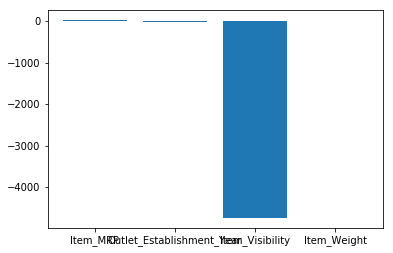

In [46]:
plot.bar(coeff[0], coeff['Coefficient Estimate'])